## Apparel Size Prediction for Kenyan E-Commerce Using Supervised Learning

**Project Description**  
This project focuses on building a predictive model that recommends the most appropriate clothing size (e.g., XS, S, M, L, XL)  
for users based on their physical attributes such as height, weight, age, gender, bust, hips, and chest measurements.  
The goal is to enhance the online shopping experience by reducing size mismatches and returns—one of the biggest challenges in e-commerce fashion.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clothing_size_prediction_dataset.csv")

In [3]:
df.head()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,gender,size_label
0,172.967142,53.288780,59.0,NaN,114.164543,100.80285,Male,XS
1,166.617357,60.536037,30.0,106.692469,104.138267,NaN,Female,S
2,174.476885,55.869097,58.0,81.157240,109.416462,NaN,Female,S
3,183.230299,61.780063,23.0,85.127791,97.886097,NaN,Female,S
4,165.658466,66.787745,NaN,92.123801,85.230682,NaN,Female,M


In [4]:
# Check initial data info
print("Initial Data Overview:")
print(df.info())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height_cm   5700 non-null   float64
 1   weight_kg   5700 non-null   float64
 2   age         5700 non-null   float64
 3   bust_cm     2854 non-null   float64
 4   hips_cm     5700 non-null   float64
 5   chest_cm    2862 non-null   float64
 6   gender      6000 non-null   object 
 7   size_label  6000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 375.1+ KB
None


# Checking and filling missing values

In [5]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
height_cm      300
weight_kg      300
age            300
bust_cm       3146
hips_cm        300
chest_cm      3138
gender           0
size_label       0
dtype: int64


In [6]:
# Drop rows where target 'size_label' is missing
df_cleaned = df.dropna(subset=['size_label'])

In [7]:
# Fill numeric columns with median
for col in ['height_cm', 'weight_kg', 'age', 'bust_cm', 'hips_cm', 'chest_cm']:
    df_cleaned[col] = df[col].fillna(df[col].median())

In [8]:
# Confirm all missing values handled
print("After cleaning, missing values:")
print(df_cleaned.isnull().sum())

After cleaning, missing values:
height_cm     0
weight_kg     0
age           0
bust_cm       0
hips_cm       0
chest_cm      0
gender        0
size_label    0
dtype: int64


In [9]:
df_cleaned.head()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,gender,size_label
0,172.967142,53.288780,59.0,90.295917,114.164543,100.802850,Male,XS
1,166.617357,60.536037,30.0,106.692469,104.138267,99.702292,Female,S
2,174.476885,55.869097,58.0,81.157240,109.416462,99.702292,Female,S
3,183.230299,61.780063,23.0,85.127791,97.886097,99.702292,Female,S
4,165.658466,66.787745,41.0,92.123801,85.230682,99.702292,Female,M


In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height_cm   6000 non-null   float64
 1   weight_kg   6000 non-null   float64
 2   age         6000 non-null   float64
 3   bust_cm     6000 non-null   float64
 4   hips_cm     6000 non-null   float64
 5   chest_cm    6000 non-null   float64
 6   gender      6000 non-null   object 
 7   size_label  6000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 375.1+ KB


In [11]:
df_cleaned.describe()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,168.749763,70.494589,41.147667,90.212018,94.972634,99.753287
std,12.437727,15.977374,13.236820,6.892263,9.550898,6.958462
min,135.587327,30.000000,18.000000,56.651073,58.449135,55.343961
25%,161.749954,60.568568,30.000000,90.295917,88.588033,99.702292
50%,168.140393,69.940923,41.000000,90.295917,94.986812,99.702292
75%,174.452557,79.734226,52.000000,90.295917,101.155905,99.702292
max,250.000000,186.612810,64.000000,129.423310,131.113501,136.916245


**Checking for outliers**

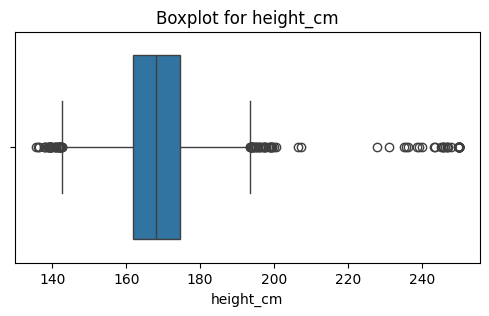

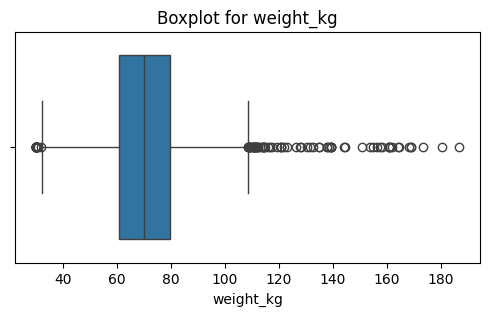

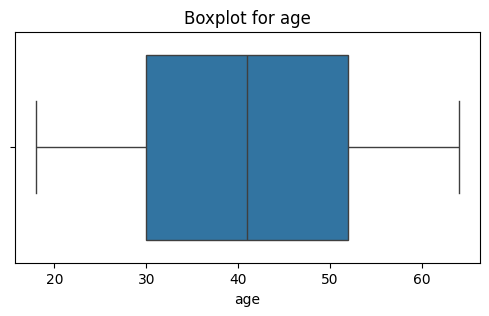

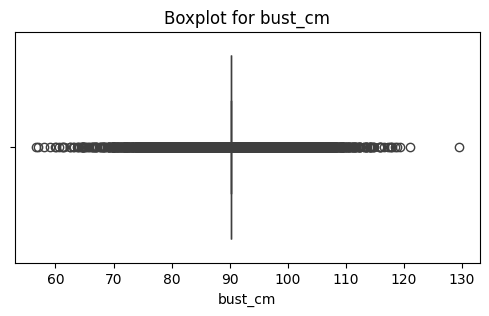

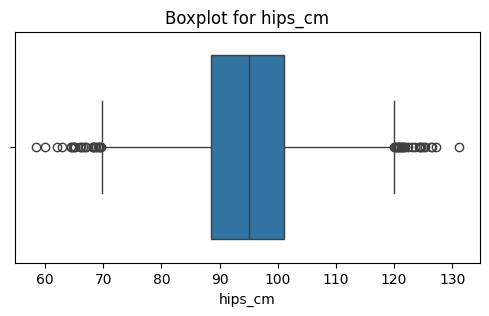

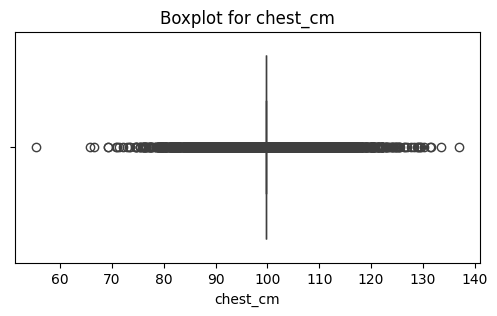

In [12]:
# Check for outliers in numerical features
numerical_cols = ['height_cm', 'weight_kg', 'age', 'bust_cm', 'hips_cm', 'chest_cm']

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

**Winsorize Outliers**  
This keeps the dataset representative while reducing the impact of extreme values.

In [ ]:
# columns_to_winsorize = ['height_cm', 'weight_kg', 'bust_cm', 'hips_cm', 'chest_cm']
# # function to winsorize outliers
# def winsorize_column(df_cleaned, column, lower_percentile=0.01, upper_percentile=0.99):
#     lower = df_cleaned[column].quantile(lower_percentile)
#     upper = df_cleaned[column].quantile(upper_percentile)
#     df[column] = df_cleaned[column].clip(lower, upper)
#     return df_cleaned


# for col in columns_to_winsorize:
#     df_cleaned = winsorize_column(df_cleaned, col)

In [14]:
# for col in columns_to_winsorize:
#     plt.figure(figsize=(6, 3))
#     sns.boxplot(data=df_cleaned, x=col)
#     plt.title(f'Boxplot After Winsorizing: {col}')
#     plt.show()